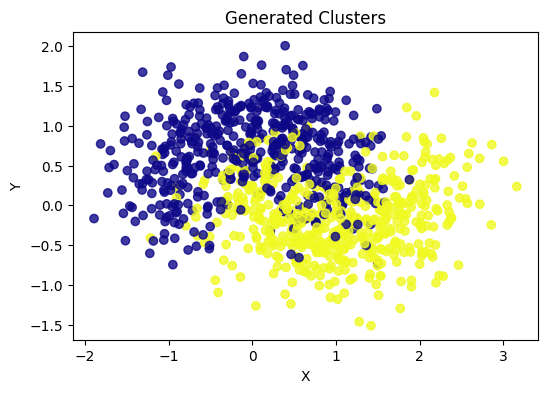

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate dataset with two clusters
X, y = make_moons(n_samples=1000,random_state=42,noise = 0.4)

# Convert to DataFrame for better handling
df = pd.DataFrame(X, columns=['X', 'Y'])
df['class'] = y

# Plot the dataset
plt.figure(figsize=(6, 4))
plt.scatter(df['X'], df['Y'], c=df['class'], cmap='plasma', alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Generated Clusters")
plt.show()


In [25]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [26]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [27]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\Ayush Maurya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5977 - loss: 0.6896 - val_accuracy: 0.5250 - val_loss: 0.6923
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5515 - loss: 0.6874 - val_accuracy: 0.5550 - val_loss: 0.6873
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5780 - loss: 0.6850 - val_accuracy: 0.5700 - val_loss: 0.6822
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5997 - loss: 0.6806 - val_accuracy: 0.6000 - val_loss: 0.6772
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6156 - loss: 0.6746 - val_accuracy: 0.6200 - val_loss: 0.6713
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6402 - loss: 0.6715 - val_accuracy: 0.6250 - val_loss: 0.6647
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6514 - loss: 0.6633 - val_accuracy: 0.6700 - val_loss: 0.6568
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6766 - loss: 0.6566 - val_accuracy: 0.6950 - 

In [30]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3)              │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5775 - loss: 0.8109 - val_accuracy: 0.6950 - val_loss: 0.6745
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6610 - loss: 0.7033 - val_accuracy: 0.7150 - val_loss: 0.6550
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7142 - loss: 0.6510 - val_accuracy: 0.7600 - val_loss: 0.6352
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7625 - loss: 0.5492 - val_accuracy: 0.7700 - val_loss: 0.6151
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8013 - loss: 0.5072 - val_accuracy: 0.7750 - val_loss: 0.5958
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7930 - loss: 0.4988 - val_accuracy: 0.7850 - val_loss: 0.5770
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8433 - loss: 0.4454 - val_accuracy: 0.7800 - val_loss: 0.5579
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8182 - loss: 0.4818 - val_accuracy: 0.

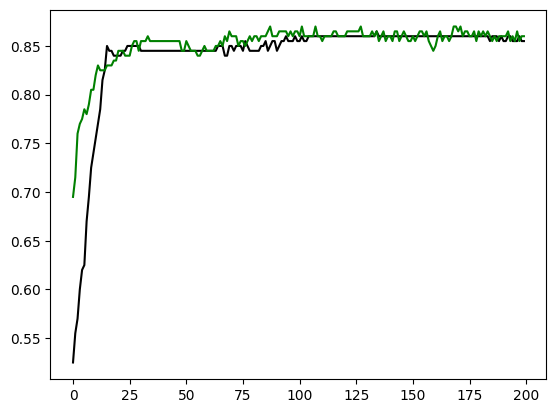

In [33]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')
